# **Gran Turismo 7 Cars Analysis**

> ### Author: Dhawalrat Leelapratak 6341096926
> #### Present : Aj.Prasert Kanawattanachai 
> <span style = 'font-size:13px;'> Course : 2602454 BUSINESS INTELLIGENCE SYSTEM

---

## **Overview**

<span style = 'font-size:15px;'>  **Gran Turismo 7 (GT7)** is racing video game developed by Polyphony Digital and published by Sony Interactive Entertainment. It is the eighth major release, the fourteenth game overall in the Gran Turismo video game series, the second game to be released on the PlayStation 4 and the first on PlayStation 5.

### Cars Main Category
1. Road Car  : Road-legal production cars; also known as Normal in some games.
2. Racing Car : Racing cars designed for a racing competition.
3. Professionally Tuned : Cars tuned by a factory or aftermarket tuning house

### Transmission 
 1. FR  : FRONT-ENGINE, REAR-WHEEL DRIVE
 2. FR  : FRONT-ENGINE, REAR-WHEEL DRIVE
 3. MR  : MID-ENGINE, REAR-WHEEL DRIVE
 4. RR  : REAR-ENGINE, REAR-WHEEL DRIVE
 5. 4WD : FOUR-WHEEL DRIVE

<span style = 'font-size:15px;'> Click here for more information --> [Gran Turismo 7 car groups explained](https://traxion.gg/gran-turismo-7-car-groups-explained/)

## **Import library**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 

import matplotlib.ticker as ticker
import ipywidgets as widgets
from ipywidgets import interact
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'


---

## **Part 1 : Clean Data**

<span style = 'font-size:15px;'> First, We will import and read csv data from https://www.kaggle.com/datasets/prasertk/gran-turismo-7-car-list

In [2]:
df = pd.read_csv('/kaggle/input/gran-turismo-7-car-list/gran_turismo_gt7.csv')
df

,model,category,pp,transmission,coll,price,hp,lbs,kg/kw,img_url
0,Abarth 1500 Biposto Bertone B.A.T 1 '52,Categories unknown,PP ??,FR,?? pts,?? Cr,72,1918.0,12.08 Kg/Hp,https://www.kudosprime.com//gts/images/cars/gt...
1,Abarth 500 '09,Road Car,PP 377,FF,29 pts,"29,500 Cr",133,2282.0,7.78 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
2,Abarth 595 SS '70,Road Car,PP 184,RR,48 pts,"≈48,900 Cr",30,1036.0,15.67 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
3,Alfa Romeo 155 2.5 V6 TI '93,Racing Car,PP 673,4WD,800 pts,"800,000 Cr",413,2227.0,2.45 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
4,Alfa Romeo 4C '14,Midship|Road Car,PP 523,MR,89 pts,"89,100 Cr",235,2094.0,4.04 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
...,...,...,...,...,...,...,...,...,...,...
420,Volkswagen Scirocco Gr.4,Racing Car,PP 656,FF,350 pts,"350,000 Cr",358,2315.0,2.93 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
421,Volkswagen Scirocco R '10,Road Car,PP 498,FF,51 pts,"51,500 Cr",252,3109.0,5.60 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
422,Volkswagen Volkswagen 1200 '66,Road Car,PP 177,RR,40 pts,"≈32,700 Cr",33,1720.0,23.64 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...
423,Wicked Fabrication Wicked Fabrication GT 51,Gran Turismo Award|Professionally Tuned,PP 518,FR,300 pts,"300,000 Cr",372,2950.0,3.60 Kg/Hp,https://www.kudosprime.com/images/cars/gt7_car...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         425 non-null    object 
 1   category      425 non-null    object 
 2   pp            425 non-null    object 
 3   transmission  425 non-null    object 
 4   coll          425 non-null    object 
 5   price         425 non-null    object 
 6   hp            425 non-null    object 
 7   lbs           409 non-null    float64
 8   kg/kw         425 non-null    object 
 9   img_url       425 non-null    object 
dtypes: float64(1), object(9)
memory usage: 33.3+ KB


<span style = 'font-size:15px;'> **As we can observe**, many columns contain units of value such as PP, pts, Cr, etc. which make the data type become an object. To handle this, we use **str.replace** to replace these units with an empty string. 
    
<span style = 'font-size:15px;'> After replacing the strings, we find that some columns still contain the string "??". To fix this problem, we replace it with **np.nan** and then use **pd.to_numeric** to convert the data type into float.

In [4]:
cols = ['pp','coll','price','kg/kw','hp']

for c in cols:
    df[c] = df[c].str.replace(r'[PPpts≈CrKg/Hp,]', '', regex= True)
    df[c] = pd.to_numeric(df[c].replace(r'[??]', np.nan, regex=True))
df['transmission'] = df['transmission'].replace(r'[??]', np.nan, regex=True)
df

,model,category,pp,transmission,coll,price,hp,lbs,kg/kw,img_url
0,Abarth 1500 Biposto Bertone B.A.T 1 '52,Categories unknown,NaN,FR,NaN,NaN,72.0,1918.0,12.08,https://www.kudosprime.com//gts/images/cars/gt...
1,Abarth 500 '09,Road Car,377.0,FF,29.0,29500.0,133.0,2282.0,7.78,https://www.kudosprime.com/images/cars/gt7_car...
2,Abarth 595 SS '70,Road Car,184.0,RR,48.0,48900.0,30.0,1036.0,15.67,https://www.kudosprime.com/images/cars/gt7_car...
3,Alfa Romeo 155 2.5 V6 TI '93,Racing Car,673.0,4WD,800.0,800000.0,413.0,2227.0,2.45,https://www.kudosprime.com/images/cars/gt7_car...
4,Alfa Romeo 4C '14,Midship|Road Car,523.0,MR,89.0,89100.0,235.0,2094.0,4.04,https://www.kudosprime.com/images/cars/gt7_car...
...,...,...,...,...,...,...,...,...,...,...
420,Volkswagen Scirocco Gr.4,Racing Car,656.0,FF,350.0,350000.0,358.0,2315.0,2.93,https://www.kudosprime.com/images/cars/gt7_car...
421,Volkswagen Scirocco R '10,Road Car,498.0,FF,51.0,51500.0,252.0,3109.0,5.60,https://www.kudosprime.com/images/cars/gt7_car...
422,Volkswagen Volkswagen 1200 '66,Road Car,177.0,RR,40.0,32700.0,33.0,1720.0,23.64,https://www.kudosprime.com/images/cars/gt7_car...
423,Wicked Fabrication Wicked Fabrication GT 51,Gran Turismo Award|Professionally Tuned,518.0,FR,300.0,300000.0,372.0,2950.0,3.60,https://www.kudosprime.com/images/cars/gt7_car...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         425 non-null    object 
 1   category      425 non-null    object 
 2   pp            373 non-null    float64
 3   transmission  413 non-null    object 
 4   coll          358 non-null    float64
 5   price         358 non-null    float64
 6   hp            410 non-null    float64
 7   lbs           409 non-null    float64
 8   kg/kw         409 non-null    float64
 9   img_url       425 non-null    object 
dtypes: float64(6), object(4)
memory usage: 33.3+ KB


<span style = 'font-size:15px;'> **Then**, use **df.rename** to rename column to make it more understandable.

In [6]:
df = df.rename(columns= {
    'pp': 'PP',
    'coll':'CP (pts)',
    'price':'price (Cr)',
    'lbs' : 'weight (lbs)',
    'hp' : 'power (hp)',
    'kg/kw':'PtW ratio (kg/hp)'
})
df

,model,category,PP,transmission,CP (pts),price (Cr),power (hp),weight (lbs),PtW ratio (kg/hp),img_url
0,Abarth 1500 Biposto Bertone B.A.T 1 '52,Categories unknown,NaN,FR,NaN,NaN,72.0,1918.0,12.08,https://www.kudosprime.com//gts/images/cars/gt...
1,Abarth 500 '09,Road Car,377.0,FF,29.0,29500.0,133.0,2282.0,7.78,https://www.kudosprime.com/images/cars/gt7_car...
2,Abarth 595 SS '70,Road Car,184.0,RR,48.0,48900.0,30.0,1036.0,15.67,https://www.kudosprime.com/images/cars/gt7_car...
3,Alfa Romeo 155 2.5 V6 TI '93,Racing Car,673.0,4WD,800.0,800000.0,413.0,2227.0,2.45,https://www.kudosprime.com/images/cars/gt7_car...
4,Alfa Romeo 4C '14,Midship|Road Car,523.0,MR,89.0,89100.0,235.0,2094.0,4.04,https://www.kudosprime.com/images/cars/gt7_car...
...,...,...,...,...,...,...,...,...,...,...
420,Volkswagen Scirocco Gr.4,Racing Car,656.0,FF,350.0,350000.0,358.0,2315.0,2.93,https://www.kudosprime.com/images/cars/gt7_car...
421,Volkswagen Scirocco R '10,Road Car,498.0,FF,51.0,51500.0,252.0,3109.0,5.60,https://www.kudosprime.com/images/cars/gt7_car...
422,Volkswagen Volkswagen 1200 '66,Road Car,177.0,RR,40.0,32700.0,33.0,1720.0,23.64,https://www.kudosprime.com/images/cars/gt7_car...
423,Wicked Fabrication Wicked Fabrication GT 51,Gran Turismo Award|Professionally Tuned,518.0,FR,300.0,300000.0,372.0,2950.0,3.60,https://www.kudosprime.com/images/cars/gt7_car...


<span style = 'font-size:15px;'> **- category -**

<span style = 'font-size:15px;'> Now, we found out that in category column contains only 4 main categories: 
    
    1. Road Car
    2. Racing Car
    3. Professionally Tuned
    4. Categories Unknown
    
<span style = 'font-size:15px;'> So we create a new column contains only the main category.

In [7]:
cat_list = []

for cat in df['category']:
    if "Road Car" in cat:
        cat_list.append("Road Car")
    elif "Racing Car" in cat:
        cat_list.append("Racing Car")
    elif "Professionally Tuned" in cat:
        cat_list.append("Professionally Tuned")
    else:
        cat_list.append(cat)

df.insert(2,'main_category',cat_list, True)
df

,model,category,main_category,PP,transmission,CP (pts),price (Cr),power (hp),weight (lbs),PtW ratio (kg/hp),img_url
0,Abarth 1500 Biposto Bertone B.A.T 1 '52,Categories unknown,Categories unknown,NaN,FR,NaN,NaN,72.0,1918.0,12.08,https://www.kudosprime.com//gts/images/cars/gt...
1,Abarth 500 '09,Road Car,Road Car,377.0,FF,29.0,29500.0,133.0,2282.0,7.78,https://www.kudosprime.com/images/cars/gt7_car...
2,Abarth 595 SS '70,Road Car,Road Car,184.0,RR,48.0,48900.0,30.0,1036.0,15.67,https://www.kudosprime.com/images/cars/gt7_car...
3,Alfa Romeo 155 2.5 V6 TI '93,Racing Car,Racing Car,673.0,4WD,800.0,800000.0,413.0,2227.0,2.45,https://www.kudosprime.com/images/cars/gt7_car...
4,Alfa Romeo 4C '14,Midship|Road Car,Road Car,523.0,MR,89.0,89100.0,235.0,2094.0,4.04,https://www.kudosprime.com/images/cars/gt7_car...
...,...,...,...,...,...,...,...,...,...,...,...
420,Volkswagen Scirocco Gr.4,Racing Car,Racing Car,656.0,FF,350.0,350000.0,358.0,2315.0,2.93,https://www.kudosprime.com/images/cars/gt7_car...
421,Volkswagen Scirocco R '10,Road Car,Road Car,498.0,FF,51.0,51500.0,252.0,3109.0,5.60,https://www.kudosprime.com/images/cars/gt7_car...
422,Volkswagen Volkswagen 1200 '66,Road Car,Road Car,177.0,RR,40.0,32700.0,33.0,1720.0,23.64,https://www.kudosprime.com/images/cars/gt7_car...
423,Wicked Fabrication Wicked Fabrication GT 51,Gran Turismo Award|Professionally Tuned,Professionally Tuned,518.0,FR,300.0,300000.0,372.0,2950.0,3.60,https://www.kudosprime.com/images/cars/gt7_car...


<span style = 'font-size:15px;'> **- Models -**

<span style = 'font-size:15px;'> For each mode, we can see that they always start with their brand, so we will split only the brands and make the brand column. But some of this brands contain more than two syllable. So we replace all the same word instead. Then, append the brands we got to dataframe.

In [8]:
# replace single 'songle code' to avoid error
df['model'] = df['model'].replace(r"[']", "", regex=True)

In [9]:
def get_brand(car):
    if "Alfa Romeo" in car:
        return "Alfa Romeo"
    elif "Aston Martin" in car:
        return "Aston Martin"
    elif "Chris Holstrom Concepts" in car:
        return "Chris Holstrom Concepts"
    elif "De Tomaso" in car:
        return "De Tomaso"
    elif "DS Automobiles" in car:
        return "DS Automobiles"
    elif "Eckerts Rod & Customs" in car:
        return "Eckerts Rod & Customs"
    elif "Gran Turismo" in car:
        return "Gran Turismo"
    elif "RE Amemiya" in car:
        return "RE Amemiya"
    elif "Super Formula" in car:
        return "Super Formula"
    elif "Wicked Fabrication" in car:
        return "Wicked Fabrication"
    else:
        split_txt = car.split(" ")
        return split_txt[0]

In [10]:
brand_list = []
for get_model in df.model:
    brand_list.append(get_brand(get_model))


In [11]:
df.insert(1,'brand',brand_list, True)
df

,model,brand,category,main_category,PP,transmission,CP (pts),price (Cr),power (hp),weight (lbs),PtW ratio (kg/hp),img_url
0,Abarth 1500 Biposto Bertone B.A.T 1 52,Abarth,Categories unknown,Categories unknown,NaN,FR,NaN,NaN,72.0,1918.0,12.08,https://www.kudosprime.com//gts/images/cars/gt...
1,Abarth 500 09,Abarth,Road Car,Road Car,377.0,FF,29.0,29500.0,133.0,2282.0,7.78,https://www.kudosprime.com/images/cars/gt7_car...
2,Abarth 595 SS 70,Abarth,Road Car,Road Car,184.0,RR,48.0,48900.0,30.0,1036.0,15.67,https://www.kudosprime.com/images/cars/gt7_car...
3,Alfa Romeo 155 2.5 V6 TI 93,Alfa Romeo,Racing Car,Racing Car,673.0,4WD,800.0,800000.0,413.0,2227.0,2.45,https://www.kudosprime.com/images/cars/gt7_car...
4,Alfa Romeo 4C 14,Alfa Romeo,Midship|Road Car,Road Car,523.0,MR,89.0,89100.0,235.0,2094.0,4.04,https://www.kudosprime.com/images/cars/gt7_car...
...,...,...,...,...,...,...,...,...,...,...,...,...
420,Volkswagen Scirocco Gr.4,Volkswagen,Racing Car,Racing Car,656.0,FF,350.0,350000.0,358.0,2315.0,2.93,https://www.kudosprime.com/images/cars/gt7_car...
421,Volkswagen Scirocco R 10,Volkswagen,Road Car,Road Car,498.0,FF,51.0,51500.0,252.0,3109.0,5.60,https://www.kudosprime.com/images/cars/gt7_car...
422,Volkswagen Volkswagen 1200 66,Volkswagen,Road Car,Road Car,177.0,RR,40.0,32700.0,33.0,1720.0,23.64,https://www.kudosprime.com/images/cars/gt7_car...
423,Wicked Fabrication Wicked Fabrication GT 51,Wicked Fabrication,Gran Turismo Award|Professionally Tuned,Professionally Tuned,518.0,FR,300.0,300000.0,372.0,2950.0,3.60,https://www.kudosprime.com/images/cars/gt7_car...


---

## **Part 2 : Data Exporation**

<span style = 'font-size:15px;'> We create a new dataframe to display only information that has been categorized, as information with 'Unknown Category' will not be shown.

In [12]:
df_cat= df[df['main_category'] != "Categories unknown"]
df_cat['main_category'].value_counts().index

Index(['Road Car', 'Racing Car', 'Professionally Tuned'], dtype='object')

### **Overall**

1. <span style = 'font-size:15px;'>  **Transmission Distribution** - Each main category consists of 5 transmissions

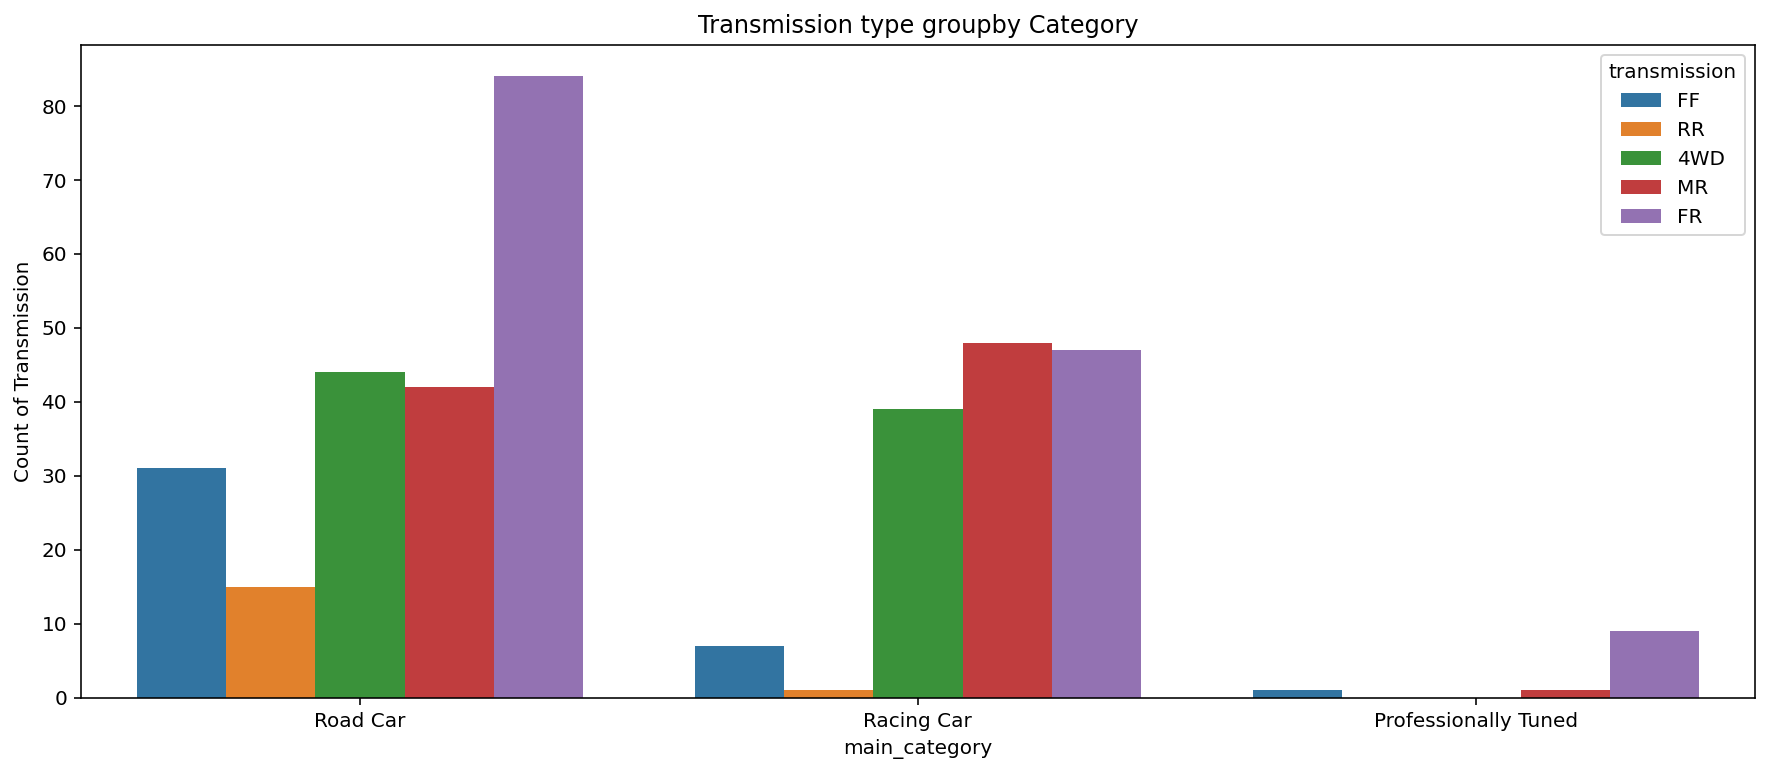

In [13]:
plt.figure(figsize=(15,6))
ax= sns.countplot(x ='main_category',data = df_cat,
    order = df_cat['main_category'].value_counts().index,
    hue='transmission');
ax.set(ylabel = 'Count of Transmission')
plt.title('Transmission type groupby Category')
plt.show()



<span style = 'font-size:15px;'>  From this graph, we can implies that Road car have the largest nunmbes in the game, followed by Racing Car and the last is Professionaly Tunes. Most of the cars in Road Car and Professionally Tunes category equipped the FR transmission. On the otherhand, Most cars in Racing Car seems to be MR transmission.

<span style = 'font-size:15px;'> 2. **Model Comparing** - This graph will allow you to compare the following information between two models:
* performance point 
* price
* power
* weight

In [14]:
dim_list = ['PP', 'price (Cr)', 'power (hp)','weight (lbs)']
car_list = []
    
for c in df_cat['model']:
    car_list.append(c)

In [15]:
@interact(Car1 = car_list, Car2 = car_list, Dimension = dim_list)
def plot_chart(Car1,Car2,Dimension):
    graph = df_cat[df_cat['model'].isin([Car1,Car2])]
    plt.figure(figsize=(5,5))
    sns.barplot(data = graph, x= 'model' , y= Dimension)

    ax = plt.gca()

    if Dimension == 'PP':
        plt.title(f'Performance point between "{Car1}" and "{Car2}"')
    elif Dimension == 'price (Cr)':
        plt.title(f'Price between "{Car1}" and "{Car2}"')
    elif Dimension ==  'power (hp)':
        plt.title(f'Horse power "{Car1}" and "{Car2}"')
    else:
        plt.title(f'Weight between "{Car1}" and "{Car2}"')
        
    
        

    def y_axis_numformat(x, pos):
        return "{:,.0f}".format(x)

    # Apply the formatter to the y-axis
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_axis_numformat))

    plt.show()


interactive(children=(Dropdown(description='Car1', options=('Abarth 500 09', 'Abarth 595 SS 70', 'Alfa Romeo 1…

<span style = 'font-size:15px;'>  Now that you've seen our overall information, let's keep taking a look deeper. The following information will show you only the focused points.

In [16]:
df_p = df_cat.drop( ['category','CP (pts)','power (hp)','weight (lbs)', 'PtW ratio (kg/hp)', 'img_url'], axis= 1)
df_p

,model,brand,main_category,PP,transmission,price (Cr)
1,Abarth 500 09,Abarth,Road Car,377.0,FF,29500.0
2,Abarth 595 SS 70,Abarth,Road Car,184.0,RR,48900.0
3,Alfa Romeo 155 2.5 V6 TI 93,Alfa Romeo,Racing Car,673.0,4WD,800000.0
4,Alfa Romeo 4C 14,Alfa Romeo,Road Car,523.0,MR,89100.0
5,Alfa Romeo 4C Gr.3,Alfa Romeo,Racing Car,724.0,MR,450000.0
...,...,...,...,...,...,...
420,Volkswagen Scirocco Gr.4,Volkswagen,Racing Car,656.0,FF,350000.0
421,Volkswagen Scirocco R 10,Volkswagen,Road Car,498.0,FF,51500.0
422,Volkswagen Volkswagen 1200 66,Volkswagen,Road Car,177.0,RR,32700.0
423,Wicked Fabrication Wicked Fabrication GT 51,Wicked Fabrication,Professionally Tuned,518.0,FR,300000.0


### **Order of Data** 

<span style = 'font-size:15px;'>  We can't deny that in a game, most players may initially play for fun, but what makes the game enjoyable? Of course VICTORY! However, just having skills is not enough to achieve those victory. This table allows you to choose the cars with the desired level of performance.

In [17]:
w_perf = widgets.IntRangeSlider(
    value=[df_p['PP'].min(), df_p['PP'].max()], 
    min = 0, 
    max = 1200, 
    step = 30,
    description = 'Performance Points:',
    orientation='horizontal',
    style={'handle_color': 'purple', 'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)


@interact
def filter(table = w_perf):  
    return df_p[(df_p["PP"] >= table[0]) & (df_p["PP"] <= table[1])].sort_values('PP', ascending=False)


interactive(children=(IntRangeSlider(value=(86, 1200), description='Performance Points:', layout=Layout(width=…

<span style = 'font-size:15px;'>  In the world of Gran Turismo 7, this table shows the performance points of all available cars, ranked from the highest to the lowest. The reason that racing cars equipped with 4WD and MR transmissions are at the top of the table is because they require a higher level of performance in order to maintain their speed and compete with other cars. Meanwhile, road cars and professionally tuned cars often share similar levels of performance. By examining the table, you will get a clear idea of the performance capabilities of each car, making it easier for you to make an informed decision based on your specific needs and preferences.

<span style = 'font-size:15px;'>  We've included the price information in this table to help players determine which car is the best value for their money. As you can see, having the highest level of performance does not always correspond with the highest cost, and similarly, the car with the highest price tag is not necessarily the best option in terms of performance. If you're seeking to purchase a car based on its performance capabilities in the game, we suggest using this table as a useful reference tool.

### **Correlation of data**

<span style = 'font-size:15px;'>  A correlation value is a numerical measurement between two variables. I use this to measures how strong two variables are related to each other. The correlation value can range from -1 to 1.
* Value of 1   : Perfect positive correlation meaning that as one variable increases, the other variable also increases. 
* Value of -1  : Perfect negative correlation, meaning that as one variable increases, the other variable decreases. 
* Value of 0   : There is no relationship between the two variables.

<span style = 'font-size:15px;'>  To evaluate the performance of a model, there are many factors that can play a role. In order to understand the relationships between these factors, it is important to examine the correlations between them. This helps us to determine which factors have the strongest influence on model performance. 

<span style = 'font-size:15px;'>  Please noted that this correlation may not provided accuracy if we add more information in the future.

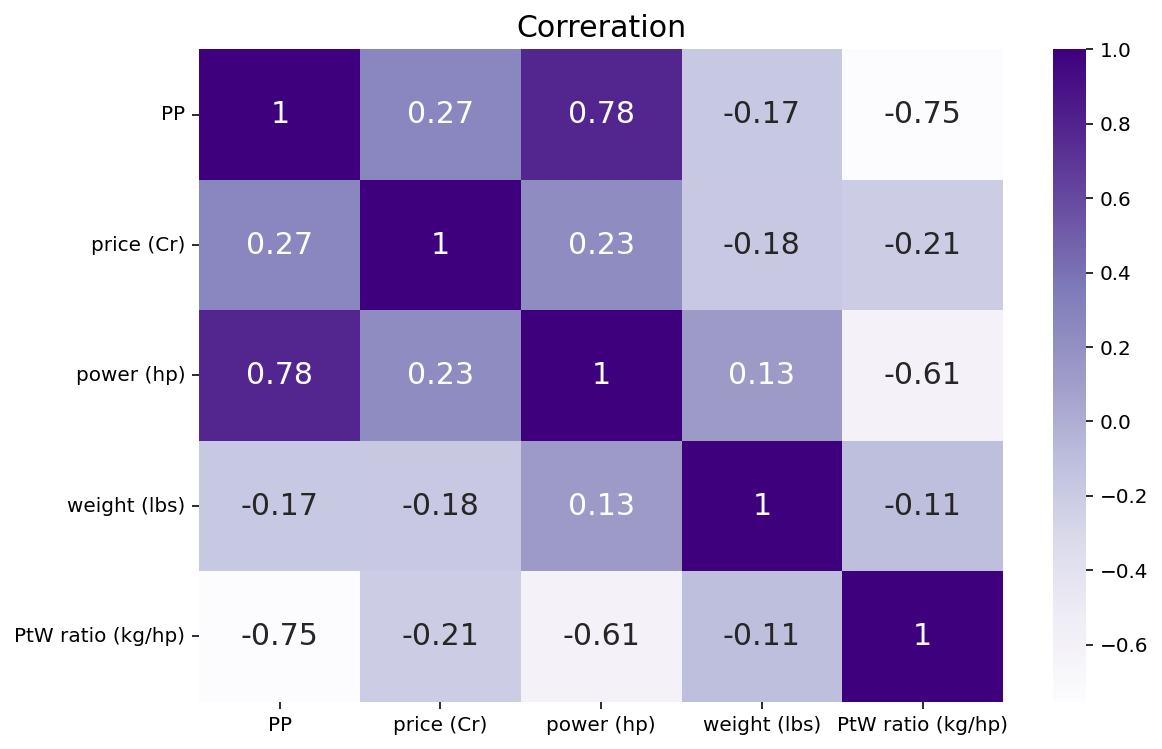

In [18]:
chart_corr = df[['PP', 'price (Cr)', 'power (hp)','weight (lbs)','PtW ratio (kg/hp)']].corr()
plt.figure(figsize= (9,6))
sns.heatmap(chart_corr, cmap = 'Purples', annot = True, annot_kws = {"size": 15})

plt.title('Correration', fontsize = 15)
plt.show()

<span style = 'font-size:15px;'>  From the correlation graph, it appears that two factors are related to performance points:

   1. Power to Weight ratio
   2. Horse power 

<span style = 'font-size:15px;'>  We will show how they affect each other.

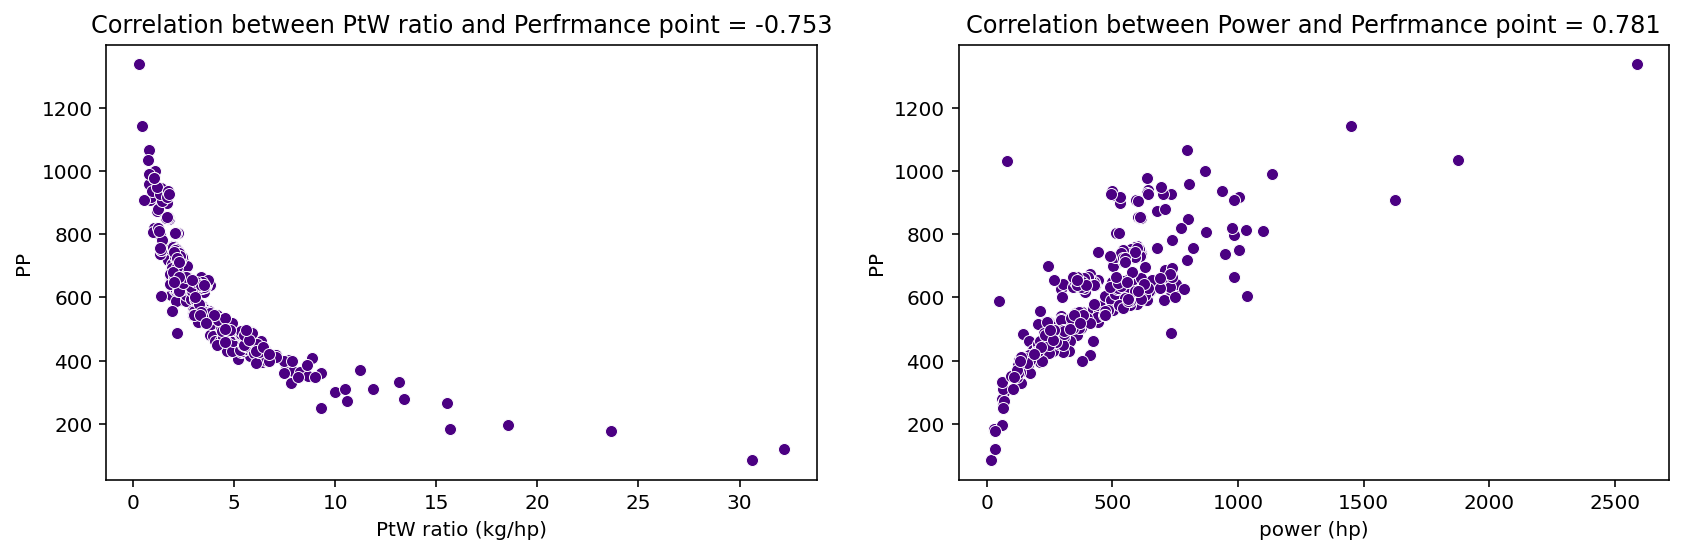

In [19]:
corr_ptw = round(df['PtW ratio (kg/hp)'].corr(df['PP']),3)
corr_power = round(df['power (hp)'].corr(df['PP']),3)

fig = plt.figure(figsize=(14,4))
fig.add_subplot(121)
sns.scatterplot(x = 'PtW ratio (kg/hp)', y= 'PP', data = df , color='indigo')
plt.title(f'Correlation between PtW ratio and Perfrmance point = {corr_ptw}')
fig.add_subplot(122)
sns.scatterplot(x = 'power (hp)', y= 'PP', data = df , color='indigo')
plt.title(f'Correlation between Power and Perfrmance point = {corr_power}');

<span style = 'font-size:15px;'> This scatter plot describe the relationship we mentioned above. Now it's time to describe each graph. 

<span style = 'font-size:15px;'> **First graph** 

<span style = 'font-size:15px;'> The correlation between the power-to-weight ratio and performance points is -0.753. It means that both vairable have highly negative correlation. The less power to weight ratio are, the more performance point we will get. The reason could be because a high power-to-weight ratio may lead to a heavier overall car weight, which can negatively impact the car's acceleration and handling. Moreover, a higher power-to-weight ratio may also result in higher fuel consumption, which could further reduce the car's performance.

<span style = 'font-size:15px;'> **Second graph** 

<span style = 'font-size:15px;'> The correlation between the horse power and performance point is 0.781. It means that both variable have highly positive correlation. The more horse power are, the more performance point we will get. The reason could be because horse power is a measure of a vehicle's engine power, and is directly related to its ability to perform well in terms of acceleration, speed, and overall performance.

### **Price of each brand** 

<span style = 'font-size:15px;'> The graph shows the distribution of prices within a brand. It provides information each price point. By analyzing the distribution of prices, we gain insights into the brand's pricing strategy and positions in the market.
    


<span style = 'font-size:12px;'> **Noted that some of the cars may not provided the price.*

In [20]:
df_b = df_p.drop( ['main_category', 'PP', 'transmission'], axis= 1)
df_b

,model,brand,price (Cr)
1,Abarth 500 09,Abarth,29500.0
2,Abarth 595 SS 70,Abarth,48900.0
3,Alfa Romeo 155 2.5 V6 TI 93,Alfa Romeo,800000.0
4,Alfa Romeo 4C 14,Alfa Romeo,89100.0
5,Alfa Romeo 4C Gr.3,Alfa Romeo,450000.0
...,...,...,...
420,Volkswagen Scirocco Gr.4,Volkswagen,350000.0
421,Volkswagen Scirocco R 10,Volkswagen,51500.0
422,Volkswagen Volkswagen 1200 66,Volkswagen,32700.0
423,Wicked Fabrication Wicked Fabrication GT 51,Wicked Fabrication,300000.0


In [21]:
df_b.groupby(['brand', 'model']).sum()

price (Cr)
brand              model                                                  
AMG                AMG A 45 AMG 13                                 64000.0
                   AMG Mercedes-AMG C 63 S 15                     135800.0
                   AMG Mercedes-AMG GT Black Series 20            420000.0
                   AMG Mercedes-AMG GT R 17                       184000.0
                   AMG Mercedes-AMG GT S 15                       120000.0
...                                                                    ...
Volkswagen         Volkswagen Scirocco Gr.4                       350000.0
                   Volkswagen Scirocco R 10                        51500.0
                   Volkswagen Volkswagen 1200 66                   32700.0
Wicked Fabrication Wicked Fabrication Wicked Fabrication GT 51    300000.0
Zagato             Zagato IsoRivolta Zagato VGT                  1000000.0

[370 rows x 1 columns]

In [22]:
car_brand = df_b['brand'].unique()
car_brand

array(['Abarth', 'Alfa Romeo', 'Alpine', 'AMG', 'Amuse', 'Aston Martin',
       'Audi', 'Autobianchi', 'BAC', 'BMW', 'Bugatti', 'Chaparral',
       'Chevrolet', 'Chris Holstrom Concepts', 'Citroen', 'Daihatsu',
       'De Tomaso', 'DMC', 'Dodge', 'DS Automobiles',
       'Eckerts Rod & Customs', 'Ferrari', 'Fiat', 'Ford', 'Genesis',
       'Gran Turismo', 'Greddy', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar',
       'Jeep', 'KTM', 'Lamborghini', 'Lancia', 'Lexus', 'Maserati',
       'Mazda', 'McLaren', 'Mercedes-Benz', 'MINI', 'Mitsubishi',
       'Nissan', 'Pagani', 'Peugeot', 'Plymouth', 'Pontiac', 'Porsche',
       'Radical', 'RE Amemiya', 'Renault', 'RUF', 'Shelby', 'Subaru',
       'Super Formula', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
       'Wicked Fabrication', 'Zagato'], dtype=object)

In [23]:
@interact(Brand = car_brand)
def price_brand(Brand):
    plt.figure(figsize=(10,5))
    graph = df_b[df_b['brand'].isin([Brand])]
    sns.pointplot(x=graph['model'], y=graph['price (Cr)'] , color='indigo')
    plt.title(f'Price distribution for {Brand}')
    plt.xticks(rotation=90)

    ax = plt.gca()

    def y_axis_numformat(y, pos):
        return "{:,.0f}".format(y)
    plt.ylim(0, None)

    # Apply the formatter to the y-axis
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_axis_numformat))

    text = f'{Brand} Average Price: {graph["price (Cr)"].mean():,.2f} Cr\n{Brand} Min Price: {graph["price (Cr)"].min():,.2f}\n{Brand} Max Price: {graph["price (Cr)"].max():,.2f}\n'
    plt.annotate(text, xy=(1.10, 0.02), xycoords='axes fraction', fontsize=16)

    plt.show()

interactive(children=(Dropdown(description='Brand', options=('Abarth', 'Alfa Romeo', 'Alpine', 'AMG', 'Amuse',…

---

## **Part3 : Summary**

<span style = 'font-size:15px;'> **In conclusion**, we obtained this information regarding the cars in the Gran Turismo 7 (GT7) game. As you can see from the first graph, the largest category of cars in the game is Road cars and the majority of these cars are equipped with FR transmissions. Additionally, the information of two car models can be easily compared, making it easier for players to determine which car may be the best fit for their needs.

<span style = 'font-size:15px;'>We also display the greatest performing cars in the game, ranked from highest to lowest performance and showing their  prices. This will help players determine which car offers the best value for players to play.

<span style = 'font-size:15px;'>Moreover, we have displayed the correlation of the factors that are highly related to the performance points which is Power to weight ratio and Horse Power. This information will be useful for players who want to understand the relationship between various factors and how they affect to the performance of their chosen car.

<span style = 'font-size:15px;'>As for final graph shows price distribution within a brand. By analyzing the distribution of prices, we gain insights into the brand's pricing strategy and positions in the market.

<span style = 'font-size:15px;'>So the information and graphs presented here will guide players in your decision-making process as they choose a car to play with in Grand Turismo 7. Lastly, the author hope that you will have a better understanding of the in-game cars and will be able to make a better choice.